# MNIST Handwritten Digit Classification with CNN

This notebook demonstrates how to build and train a Convolutional Neural Network (CNN) using TensorFlow and Keras to classify handwritten digits from the MNIST dataset. The dataset consists of grayscale images of digits from 0 to 9, each with a size of 28x28 pixels.

### Steps Covered:
1. Loading and exploring the dataset.
2. Preprocessing the data.
3. Building the CNN model.
4. Training the model.
5. Evaluating the model.
6. Making predictions.


In [11]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [7]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist  # MNIST is a dataset of handwritten digits, images are 28x28 pixels

# Split dataset into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print shapes of training and testing data
print(x_train.shape)  # Should output: (60000, 28, 28)
print(x_test.shape)   # Should output: (10000, 28, 28)


(60000, 28, 28)
(10000, 28, 28)


## Visualize the First Image

Let's take a look at the first image in the training dataset to understand the data better.


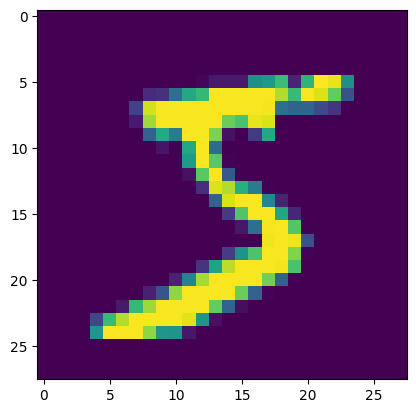

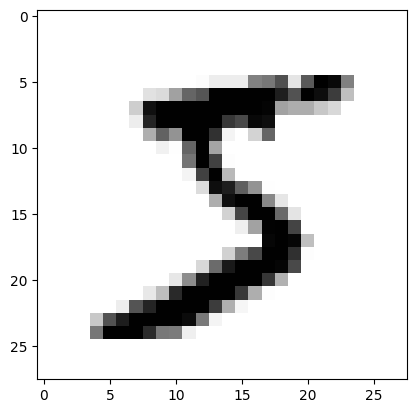

In [2]:
import matplotlib.pyplot as plt ##pip install matplotlib
plt.imshow(x_train[0])
plt.show() ##in order to excecute the graph
plt.imshow(x_train[0],cmap = plt.cm.binary)


In [ ]:
##Checking the values of each pixel


In [ ]:
print(x_train[0]) # before normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## Data Preprocessing

The images are in grayscale (0 to 255). We need to normalize the data to scale pixel values to the range [0, 1]. Additionally, we need to reshape the images to include a channel dimension for convolutional operations.


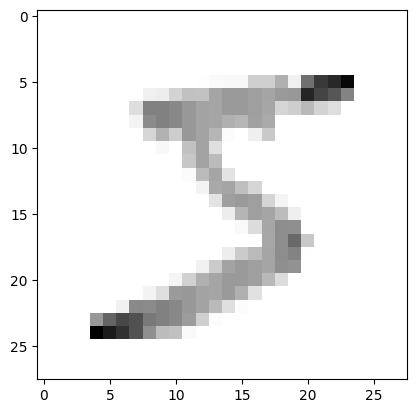

In [3]:
x_train = tf.keras.utils.normalize(x_train, axis =1)
x_test = tf.keras.utils.normalize(x_test, axis =1)
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [4]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [5]:
print(y_train[0]) # just to check that we have labels inside our network

5


## Reshape Data for Convolutional Layers

We need to reshape the images to include a channel dimension (1 for grayscale) to make them suitable for convolution operations.


In [8]:
IMG_SIZE=28
x_trainr = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) # increasing one dimension
x_testr = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1) # increasing one dimension
print("Training sample dimension after reshaping : ", x_trainr.shape)
print("Testing sample dimension after reshaping : ", x_testr.shape)

Training sample dimension after reshaping :  (60000, 28, 28, 1)
Testing sample dimension after reshaping :  (10000, 28, 28, 1)


## Build and Compile the CNN Model

We will create a CNN with three convolutional layers followed by max pooling, and then add fully connected layers.


In [10]:
# Creating a Deep Neural Network
# Training on 60,000 samples of MNIST handwritten dataset
print(x_trainr.shape[1:])

(28, 28, 1)


In [ ]:
#Syntax for Convolution :
#keras.layers.Conv2D(filters, kernel_size, strides=(1, 1),
 # padding='valid', data_format=None, dilation_rate=(1, 1),
  #activation=None, use_bias=True, kernel_initializer='glorot_uniform',
  #bias_initializer='zeros', kernel_regularizer=None,
  #bias_regularizer=None, activity_regularizer=None,
  #kernel_constraint=None, bias_constraint=None)

In [12]:
# Creating a neural network now
model=Sequential()

# First convulation Layer
model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:], activation="relu")) #input layer should be mentioned only for the first convolution layer
model.add(MaxPooling2D(pool_size=(2,2))) #Maxpooling It will get single maximum value of 2x2,rest it will drop

# Second convolution layer
model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Third Convolution layer
model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully Connected Layer
model.add(Flatten()) # before using fully connected layer, need to flatten so that 2D becomes 1D
model.add(Dense(64, activation="relu")) #Here we have 64 neurons

# Fully connected Layer 2
model.add(Dense(32, activation="relu"))

#Last Fully connected layer, output must be equal to number of classes , 10 (0 to 9)
model.add(Dense(10, activation="softmax")) #dense layer must be equal to 10 and activation should be softmax (class probabilities)

#for binary classification, one neuron in last dense layer and activation layer would be sigmoid, most of the time

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
print("Total Training Samples = ",len(x_trainr))

Total Training Samples =  60000


## Train the Model

We will train the model on the training data and validate it using a portion of the training set.


In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [16]:
model.fit(x_trainr, y_train, epochs=5, validation_split=0.3) # Training my model

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 69s 51ms/step - accuracy: 0.8037 - loss: 0.7885 - val_accuracy: 0.9624 - val_loss: 0.1306
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.9684 - loss: 0.1045 - val_accuracy: 0.9692 - val_loss: 0.1059
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.9749 - loss: 0.0796 - val_accuracy: 0.9774 - val_loss: 0.0762
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 67s 51ms/step - accuracy: 0.9814 - loss: 0.0609 - val_accuracy: 0.9748 - val_loss: 0.0896
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 65s 50ms/step - accuracy: 0.9828 - loss: 0.0569 - val_accuracy: 0.9782 - val_loss: 0.0738


In [ ]:
# validation accuracy ~= accuracy this is how it should be
# if validation accuracy < accuracy this is overfitting => solution to overfitting is dropout layer

## Evaluate the Model

Let's evaluate the model on the test data and check its performance.


In [18]:
# Evaluateing on testing data on Mnist
test_loss, test_acc= model.evaluate(x_testr,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9750 - loss: 0.0928


In [19]:
print("Test Loss on 10000 test samples",test_loss)
print("Validation Accuracy on 10000 test samples", test_acc)

Test Loss on 10000 test samples 0.0739050954580307
Validation Accuracy on 10000 test samples 0.9790999889373779


In [21]:
preedictions=model.predict([x_testr])

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


In [22]:
print(preedictions)

[[1.7948452e-07 1.0196772e-07 3.9885028e-05 ... 9.9989551e-01
  1.3138532e-07 2.5531713e-06]
 [1.4691789e-05 5.3221531e-05 9.9991578e-01 ... 5.3901167e-06
  1.2381416e-07 1.8060042e-09]
 [1.1337350e-10 9.9999994e-01 1.3230412e-09 ... 9.6595981e-11
  2.2875532e-10 8.6324399e-11]
 ...
 [1.1483949e-05 1.9827463e-05 1.2790126e-05 ... 5.8798878e-06
  2.7799932e-03 3.2390650e-05]
 [1.5420697e-07 8.7311798e-07 1.6734610e-08 ... 1.0187137e-08
  2.5434123e-04 9.3882787e-05]
 [9.3084083e-07 1.4483106e-07 9.7459223e-09 ... 6.4055351e-11
  1.8687265e-08 2.6040070e-09]]


In [23]:
# in order to undertstand , convert the predictions from one hot encoding, we need to use numpy for that
print(np.argmax(preedictions[0])) #so actually argmax will find the maximim value index and find the value of it

7


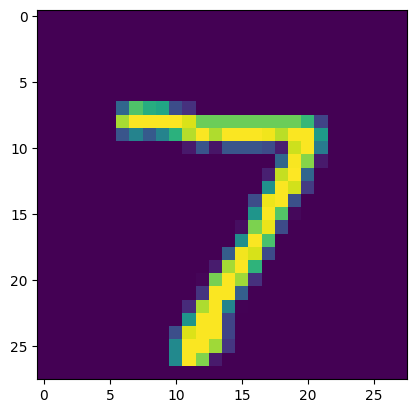

In [24]:
#now to check that is our answer is true or not
plt.imshow(x_test[0])